<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Dimensionality reduction & Clustering in Single cell RNA-seq data</h1>
<br>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Dimensionality Reduction</h1>

- Dimensionality reduction methods seek to take a large set of variables and return a smaller set of components that still contain most of the information in the original dataset. 
- This implies an inherent tradeoff between information loss and improved interpretability: all dimensionality reduction methods discard some information, but they also play an important role in helping us make sense of a giant matrix of values.

We already saw one example of dimensionality reduction in PCA in the <a href="https://www.kaggle.com/aayush9753/3-normalization-pca-in-single-cell-rna-seq-data/notebook?select=brain_normalized.zip">previous notebook</a> 

Let's look at two other common approaches to dimensionality reduction: tSNE and UMAP.

# tSNE 
- tSNE (t-Distributed Stochastic Neighbor Embedding) combines dimensionality reduction (e.g. PCA) with random walks on the nearest-neighbour network to map high dimensional data (i.e. our 18,585 dimensional expression matrix) to a 2-dimensional space. 
- In contrast with PCA, tSNE can capture nonlinear structure in the data, and tries to preserve the local distances between cells. - - Due to the non-linear and stochastic nature of the algorithm, tSNE is more difficult to intuitively interpret: while tSNE faithfully represents local relationships, it doesn't always capture the relatioships between more distant cells correctly.
-  The method when run multiple times on the same dataset will result in different plots because tSNE is a stochastic algorithm. 
- To ensure reproducibility, we fix the "seed" of the random-number generator in the code below so that we always get the same plot.

### Installations

In [1]:
!pip install -q scanpy

import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

### Loading the Normalized data

In [2]:
adata = sc.read('../input/theory-introto-singlecell-rnaseq-images/brain_normalized/brain_normalized.h5ad')

In [3]:
adata.var.head()

,ERCC,n_cells,n_counts,mean,std
0610005C13Rik,False,28,402.0,0.016376,0.202364
0610007C21Rik,False,2358,686914.0,3.775246,2.542979
0610007L01Rik,False,951,122212.0,1.127669,1.956620
0610007N19Rik,False,266,21897.0,0.295270,1.082449
0610007P08Rik,False,577,55529.0,0.621058,1.495668


In [4]:
adata.obs.head()

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
cell,,,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0


In [5]:
adata.X.shape

(3210, 18585)

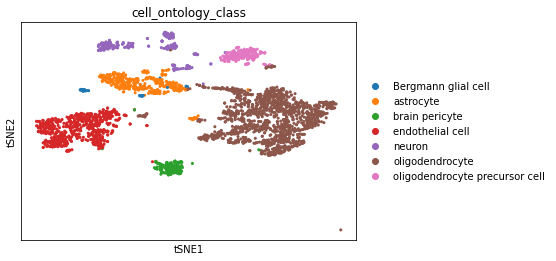

In [6]:
sc.tl.tsne(adata, perplexity=30, learning_rate=1000, random_state=0)  # add X_tsne in obsm

sc.pl.tsne(adata, color='cell_ontology_class')  # Plots using X_tsne which is tSNE coordinates of data.

In [9]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'mouse.id_colors', 'pca', 'plate.barcode_colors', 'tsne', 'cell_ontology_class_colors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

You can see that adata.obsm is updated with X_tsne which is tSNE coordinates of data.

Here, we see that tSNE generally does a good job of grouping similar cell types together (much better than PCA alone), but there are still some neurons that are not grouped together.

# UMAP 
- UMAP (Uniform Approximation and Projection) is another nonlinear dimensionality reduction method. 
- Like tSNE, UMAP is nondeterministic and requires that we fix the random seed to ensure reproducibility. 
- While tSNE optimizes for local structure, UMAP tries to balance the preservation of local and global structure. For this reason, we prefer UMAP over tSNE for exploratory analysis and general visualization.

In [11]:
sc.pp.neighbors(adata) # UMAP is based on the neighbor graph; we'll compute this first
# |_ Compute a neighborhood graph of observations
# Depending on copy, updates or returns adata with the following: connectivities and distances.
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)  # # add X_umap in obsm

2021-09-16 21:56:15.088526: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-16 21:56:15.088713: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


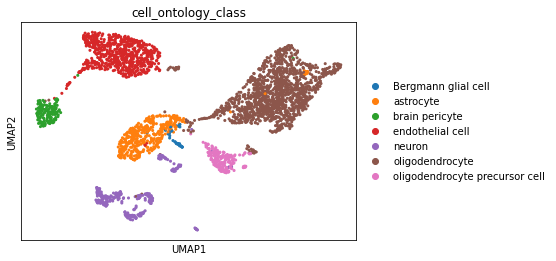

In [12]:
sc.pl.umap(adata, color='cell_ontology_class')

In [14]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'mouse.id_colors', 'pca', 'plate.barcode_colors', 'tsne', 'cell_ontology_class_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Here, we see that UMAP generally does a a better job of grouping like cells together and achieving clean separation between cell types. 

Let's save our anndata object with our new embeddings to file for later use.

In [15]:
adata.X.shape

(3210, 18585)

In [16]:
adata.write('brain_embeddings.h5ad')

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Clustering</h1>

- Grouping cells based on the similarity of their expression profiles allows us to identify cell types and states, as well as infer differences between groups. This is done either via clustering or community detection.

- Some of the most popular approaches are hierarchical clustering and k-means clustering. These methods compute a **distance metric between cells (often based on a low-dimensional representation, such as PCA, tSNE or UMAP), and then iteratively group cells together based on these distances.**

- **Community detection methods (also referred to as 'graph-based clustering') partition the neighbor graph. The neighbor graph treats each cell as a node, with edges connecting each node to its k nearest neighbors (based on similar distance metrics described above). The graph is then partitioned into modules based on these connectivities. These methods are typically faster than other clustering methods with similar effectiveness.**

- All clustering or community detection methods have is a resolution parameter that controls how fine- or coarse-grained the inferred clusters are. This parameter can have major effects on your results.

- Here, we'll explore k-means clustering and the graph-based louvain clustering method.

In [17]:
adata = sc.read('brain_embeddings.h5ad')

In [18]:
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'mouse.id_colors', 'neighbors', 'pca', 'plate.barcode_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# k-means - Applied on UMAP
- In k-means clustering, the goal is to partition N cells into k different clusters. This is done in an iterative manner, cluster centers are assigned and each cell is assigned to its nearest cluster:
- Let's try this out on the umap representation of our dataset. Scanpy doesn't include a method for k-means clustering, so we'll extract the umap coordinates that we calculated earlier and use scikit-learn for this task instead.

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans' as categorical


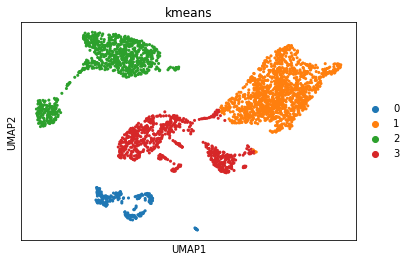

In [20]:
umap_coordinates = adata.obsm['X_umap'] # extract the UMAP coordinates for each cell
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates) # fix the random state for reproducibility

adata.obs['kmeans'] = kmeans.labels_ # retrieve the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') # plot the results, Ploting the umap with the color as the cluster label

In [25]:
print(kmeans.labels_)
adata.obs.head()

[3 3 1 ... 2 1 3]


,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts,kmeans
cell,,,,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0,3
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0,3
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0,1
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0,2
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0,3


## Evaluating clustering 

- Intuitively, **we can see from the plot that our value of k (the number of clusters) is probably too low.**
- This dataset has **"ground truth" cell type labels available (This might not be with every case) We can use these to assess our cluster labels a bit more rigorously using the adjusted Rand index.**  
- This index is a measure between (0, 1) which indicates the similarity between two sets of categorical labels (e.g., our cell type labels and cluster labels). A value of 1 means the two clusterings are identical, and 0 means the level of similarity expected by random chance.

In [35]:
adata.obs['cell_ontology_class'].unique()

['astrocyte', 'oligodendrocyte', 'endothelial cell', 'neuron', 'oligodendrocyte precursor cell', 'Bergmann glial cell', 'brain pericyte']
Categories (7, object): ['Bergmann glial cell', 'astrocyte', 'brain pericyte', 'endothelial cell', 'neuron', 'oligodendrocyte', 'oligodendrocyte precursor cell']

In [37]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.79


- The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).
- **Higher the score, better the clustering**

**Try rerunning k-means clustering with several different values of k.**
- **Lets try with K=7 as the total cell types is also 7**

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans_7' as categorical


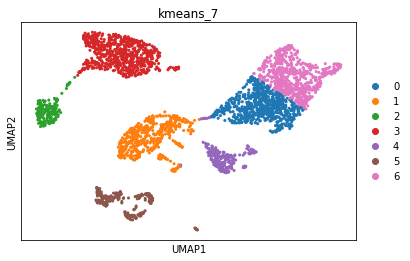

In [46]:
# Saving this results with column_name = kmeans_7

umap_coordinates = adata.obsm['X_umap'] # extract the UMAP coordinates for each cell
kmeans = KMeans(n_clusters=7, random_state=0).fit(umap_coordinates) # fix the random state for reproducibility

adata.obs['kmeans_7'] = kmeans.labels_ # retrieve the labels and add them as a metadata column in our AnnData object
adata.obs['kmeans_7'] = adata.obs['kmeans_7'].astype(str)

sc.pl.umap(adata, color='kmeans_7') # plot the results, Ploting the umap with the color as the cluster label

In [47]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans_7'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.64


We see that the score does not improve.

# Graph-based methods 
- Graph-based methods attempt to partition a pre-computed neighhbor graph into modules (i.e., groups / clusters of cells) based on their connectivity. 
- Currently, the most widely used graph-based methods for single cell data are variants of the louvain algorithm. The intuition behind the louvain algorithm is that it looks for areas of the 
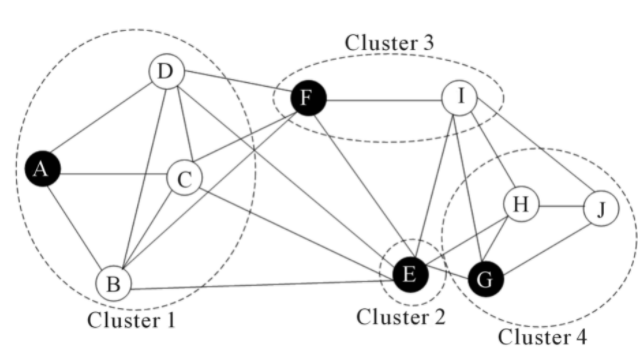

In [48]:
!pip install louvain

     |████████████████████████████████| 2.1 MB 4.4 MB/s eta 0:00:01


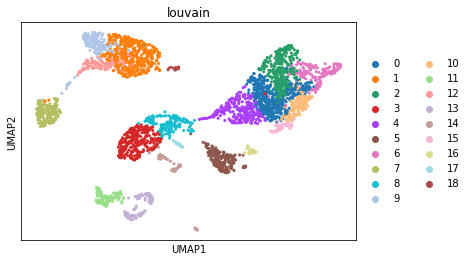

In [49]:
from scanpy.tl import louvain
louvain(adata)  # Cluster cells into subgroups # adata.obs['louvain']
sc.pl.umap(adata, color='louvain')

In [53]:
adata.obs.head()
# louvain column is added

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts,kmeans,kmeans_7,louvain
cell,,,,,,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0,3,1,3
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0,3,1,8
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0,1,0,0
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0,2,3,9
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0,3,1,8


In [54]:
adata

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts', 'kmeans', 'kmeans_7', 'louvain'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'mouse.id_colors', 'neighbors', 'pca', 'plate.barcode_colors', 'tsne', 'umap', 'kmeans_colors', 'kmeans_7_colors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [55]:
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
print('The rand index is ', round(rand_index, 2))

The rand index is  0.36


- **The low rand index with the default resolution parameter is quite low (0.34), but this increases to 0.9 when we set resolution=0.1.**
- Higher resolution means finding more and smaller clusters

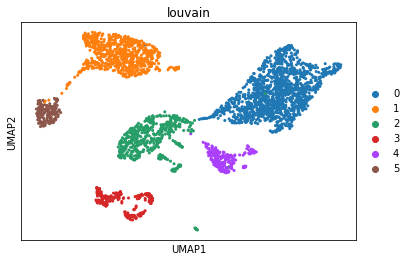

The rand index is  0.91


In [56]:
louvain(adata, resolution = 0.1)  # Cluster cells into subgroups # adata.obs['louvain']
sc.pl.umap(adata, color='louvain')

rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
print('The rand index is ', round(rand_index, 2))

- Sometimes, we may want to look at clusters within a given tissue or cell type designation. This can surface interesting heterogeneity between subpopulations, although it can also make our results more noisy.
- **Looking into the cells having Cerebellum subtissue.**

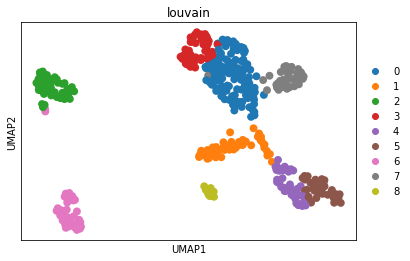

In [57]:
cerebellum = adata[adata.obs['subtissue'] == 'Cerebellum']
sc.pp.neighbors(cerebellum)
sc.tl.umap(cerebellum)

sc.tl.louvain(cerebellum)
sc.pl.umap(cerebellum, color='louvain')

In [59]:
cerebellum

AnnData object with n_obs × n_vars = 481 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts', 'kmeans', 'kmeans_7', 'louvain'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'mouse.id_colors', 'neighbors', 'pca', 'plate.barcode_colors', 'tsne', 'umap', 'kmeans_colors', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Saving the Clustered adata

In [60]:
sc.tl.louvain(adata, resolution=0.1)
adata.write('brain_clusters.h5ad')

In [61]:
!zip "brain_clusters.zip" "./brain_clusters.h5ad"

  adding: brain_clusters.h5ad (deflated 47%)


<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">Summary</h1>
<br>

#### Dimensionality Reduction
1. tSNE
2. UMAP

#### Clustering
- k-Means on tSNE
- Evaluating the k-means clustering
- Playing with No of cluster in k-means
- **Graph Based Clustering Method** - Louvain 
- Tuning thr resolution parameter
- Seeing clusters in cells of a perticular sybtissue
- Saving the adata



https://chanzuckerberg.github.io/scRNA-python-workshop/preprocessing/01-basic-qc.html